# The corpus as a network

*Turning source documents into a graph with NLP*

[Moritz Mähr](https://orcid.org/0000-0002-1367-1618) (University of Bern)

December 12, 2022

Lecture series "Einblicke in die Digital Humanities" (fall semester 2022) 

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext rich

import matplotlib

matplotlib.rcParams["figure.figsize"] = (9, 6)
%config InlineBackend.figure_format = 'retina'

import warnings

warnings.filterwarnings("ignore")

## Overview

- The Evolution of Internet Governance
- Turning source documents into a graph
    - Walkthrough of the Natural Language Processing (NLP)
    - Walkthrough of the Social Network Analysis (SNA)
- Recap

## The Evolution of Internet Governance

A digital history on the agency of technology standards.

- Research question: Which actors play a role in Internet Governance and how has their role evolved over time?
- Research data: a corpus of born digital standard documents for Internet technologies such as e-mail, WWW, etc.
- Quantitative research methods: Natural Language Processing (NLP) and Social Network Analysis (SNA)

## The RFC Editor

- The *RFC Editor* is the oldest and most important publication for Internet standards
- Internet standards like IP, e-mail, WWW, etc. are published as RFCs (Request for Comments)
- Since 1969, it has published more than 9,000 RFCs (over 225,000 pages)
- Although the process and institutional framework of standard setting have changed, the format of the RFC has remained stable
- All RFCs are publicly available under [www.rfc-editor.org](https://www.rfc-editor.org)

## An example: RFC 1945

>  The Hypertext Transfer Protocol (HTTP) is an application-level protocol with the lightness and speed necessary for distributed, collaborative, hypermedia information systems. It is a generic, stateless, object-oriented protocol which can be used for many tasks, such as name servers and distributed object management systems, through extension of its request methods (commands). A feature of HTTP is the typing of data representation, allowing systems to be built independently of the data being transferred.

## Retrieving the source document

In [2]:
import requests

rfc1945 = requests.get("https://www.rfc-editor.org/rfc/rfc1945.txt").text

## Looking at the source document

In [3]:
print(rfc1945_excerpt := rfc1945[6:917])

Network Working Group                                     T. Berners-Lee
Request for Comments: 1945                                       MIT/LCS
Category: Informational                                      R. Fielding
                                                               UC Irvine
                                                              H. Frystyk
                                                                 MIT/LCS
                                                                May 1996


                Hypertext Transfer Protocol -- HTTP/1.0

Status of This Memo

   This memo provides information for the Internet community.  This memo
   does not specify an Internet standard of any kind.  Distribution of
   this memo is unlimited.

IESG Note:

   The IESG has concerns about this protocol, and expects this document
   to be replaced relatively soon by a standards track document.


## Some remarks about the source document

- The source documents are very highly structured, which makes the extraction of metadata "relatively easy".
- Fortunatly the *RFC Editor* already did that for us [www.rfc-editor.org/rfc/rfc1945.json](https://www.rfc-editor.org/rfc/rfc1945.json)

## Retrieving the metadata

In [4]:
import json

rfc1945_metadata = json.loads(
    requests.get("https://www.rfc-editor.org/rfc/rfc1945.json").content
)

## Looking at the metadata

In [5]:
rfc1945_metadata

{
    'draft': '',
    'doc_id': 'RFC1945',
    'title': ' Hypertext Transfer Protocol -- HTTP/1.0 ',
    'authors': ['T. Berners-Lee', 'R. Fielding', 'H. Frystyk'],
    'format': ['ASCII', 'HTML'],
    'page_count': '60',
    'pub_status': 'INFORMATIONAL',
    'status': 'INFORMATIONAL',
    'source': 'HyperText Transfer Protocol',
    'abstract': ' The Hypertext Transfer Protocol (HTTP) is an application-level protocol with the lightness and speed necessary for distributed, collaborative, hypermedia information systems.  This memo provides information for the Internet community.  This memo does not specify an Internet standard of any kind.  ',
    'pub_date': 'April 1996',
    'keywords': ['HTTP-1.0', 'HTTP', 'World-Wide', 'Web', 'application'],
    'obsoletes': [],
    'obsoleted_by': [],
    'updates': [],
    'updated_by': [],
    'see_also': [],
    'doi': '10.17487/RFC1945',
    'errata_url': None
}

## More metadata

- The Internet Engineering Task Force (IETF) provides many more metadata with a very nice interface at [datatracker.ietf.org/doc/rfc1945/](https://datatracker.ietf.org/doc/rfc1945/).
- The IETF was founded in 1986 to organize all the working groups involved in standards development.
- For example, at [datatracker.ietf.org/doc/rfc1945/referencedby/](https://datatracker.ietf.org/doc/rfc1945/referencedby/) you can see which RFCs reference RFC 1945.

![Screenshot of <https://datatracker.ietf.org/doc/rfc1945/referencedby/> taken at 9.12.22](images/datatracker.ietf.org_doc_rfc1945_referencedby.png)

## Caveats

- According to [datatracker.ietf.org/](https://datatracker.ietf.org/), the metadata for RFCs with numbers smaller than about 1300 and drafts from before 2001 is unreliable and in many cases not available.
- Standard setting bodies (working groups, etc.), universities & research institutes, and companies are not properly referenced in the metadata.
- There may be much more information in the documents that is not contained in the metadata.
- Therefore, we use Natural Language Processing (NLP), more specifically Named Entity Recognition (NER), to extract more metadata.

## Named Entity Recognition (NER) with a pre-trained model

In [6]:
import re

rfc1945_excerpt = re.sub(r"\n+", "\n", rfc1945_excerpt)

In [7]:
import spacy
from spacy import displacy

language_model = "en_core_web_sm"

if not spacy.util.is_package(language_model):
    spacy.cli.download(language_model)

nlp = spacy.load(language_model)

## Named Entity Recognition (NER) with a pre-trained model

- This language model can extract the following entities by default:

| Component | Labels |
| --- | --- |
| **`ner`** | `CARDINAL`, `DATE`, `EVENT`, `FAC`, `GPE`, `LANGUAGE`, `LAW`, `LOC`, `MONEY`, `NORP`, `ORDINAL`, `ORG`, `PERCENT`, `PERSON`, `PRODUCT`, `QUANTITY`, `TIME`, `WORK_OF_ART` |

- It has a precision of 84.11%, a recall of 84.40% and an f-score of 84.25%, a decent but not mind-blowing figure. The best available models have an f-score of 94%.
- For more information about the model, see [github.com/explosion/spacy-models/releases/tag/en_core_web_sm-3.4.1](https://github.com/explosion/spacy-models/releases/tag/en_core_web_sm-3.4.1).

In [8]:
doc = nlp(rfc1945_excerpt)
displacy.render(doc, style="ent")

Network Working Group T. Berners-Lee
Request for Comments
 ORG 
 
: 
 
 1945
 CARDINAL 
 
 
 
 MIT
 ORG 
 
/LCS Category: Informational R. Fielding 
 
 UC Irvine
 ORG 
 
 H. Frystyk MIT/LCS 
 
 May 1996
 DATE 
 
 
 
 Hypertext Transfer Protocol
 WORK_OF_ART 
 
 -- HTTP/1.0 Status of This Memo This memo provides information for the Internet community. This memo does not specify an Internet standard of any kind. Distribution of this memo is unlimited. IESG Note: The 
 
 IESG
 ORG 
 
 has concerns about this protocol, and expects this document to be replaced relatively soon by a standards track document.

## Named Entity Recognition (NER) with a pre-trained model

- Quite a few false positives
- Low hit rate ("Network Working Group" and "IESG" are not recognized as organizations, persons are not recognized at all, etc.)
- Very broad categories (e.g. "ORG" for standardization bodies, universities, research institutes and companies)
- Pre-trained models are not silver bullets and must be adapted to the corpus
- This also applies to the more accurate (and more energy-consuming) transformer-based models.

## Adding custom rules to the NER pipeline

In [9]:
ruler = nlp.add_pipe("entity_ruler", before="ner")
ruler.add_patterns(
    [
        {"label": "STD_BODY", "pattern": "Network Working Group"},
        {"label": "STD_BODY", "pattern": "IESG"},
    ]
)

In [10]:
doc = nlp(rfc1945_excerpt)
displacy.render(doc, style="ent")

Network Working Group
 STD_BODY 
 
 T. Berners-Lee Request for Comments: 
 
 1945
 CARDINAL 
 
 
 
 MIT
 ORG 
 
/LCS Category: Informational R. Fielding 
 
 UC Irvine
 ORG 
 
 H. Frystyk MIT/LCS 
 
 May 1996
 DATE 
 
 
 
 Hypertext Transfer Protocol
 WORK_OF_ART 
 
 -- HTTP/1.0 Status of This Memo This memo provides information for the Internet community. This memo does not specify an Internet standard of any kind. Distribution of this memo is unlimited. 
 
 IESG
 STD_BODY 
 
 Note: The 
 
 IESG
 STD_BODY 
 
 has concerns about this protocol, and expects this document to be replaced relatively soon by a standards track document.

## Adding more complex rules to the NER pipeline

In [11]:
more_complex_pattern = [
    {
        "label": "STANDARD",
        "pattern": [
            {
                "LOWER": {
                    "IN": [
                        "bcp",
                        "fyi",
                        "ien",
                        "obsoleted",
                        "obsoletes",
                        "request",
                        "rfc",
                        "std",
                        "updated",
                        "updates",
                    ]
                }
            },
            {
                "LOWER": {
                    "IN": [
                        "for",
                        "by",
                    ]
                },
                "OP": "?",
            },
            {"TEXT": "Comments", "OP": "?"},
            {"IS_PUNCT": True, "OP": "?"},
            {"IS_DIGIT": True},
        ],
    }
]

In [12]:
more_complex_pattern

[
    {
        'label': 'STANDARD',
        'pattern': [
            {
                'LOWER': {
                    'IN': [
                        'bcp',
                        'fyi',
                        'ien',
                        'obsoleted',
                        'obsoletes',
                        'request',
                        'rfc',
                        'std',
                        'updated',
                        'updates'
                    ]
                }
            },
            {'LOWER': {'IN': ['for', 'by']}, 'OP': '?'},
            {'TEXT': 'Comments', 'OP': '?'},
            {'IS_PUNCT': True, 'OP': '?'},
            {'IS_DIGIT': True}
        ]
    }
]

## Adding more complex rules to the NER pipeline

In [13]:
ruler.add_patterns(more_complex_pattern)
doc = nlp(rfc1945_excerpt)
displacy.render(doc, style="ent")

Network Working Group
 STD_BODY 
 
 T. Berners-Lee 
 
 Request for Comments: 1945
 STANDARD 
 
 
 
 MIT
 ORG 
 
/LCS Category: Informational R. Fielding 
 
 UC Irvine
 ORG 
 
 H. Frystyk MIT/LCS 
 
 May 1996
 DATE 
 
 
 
 Hypertext Transfer Protocol
 WORK_OF_ART 
 
 -- HTTP/1.0 Status of This Memo This memo provides information for the Internet community. This memo does not specify an Internet standard of any kind. Distribution of this memo is unlimited. 
 
 IESG
 STD_BODY 
 
 Note: The 
 
 IESG
 STD_BODY 
 
 has concerns about this protocol, and expects this document to be replaced relatively soon by a standards track document.

## Turning RFC 1945 into a graph

- RFC 1945 can be represented as a graph with nodes and edges.
- If we are interested in the social network of authors, we represent
  - standards and authors as nodes, and 
  - the relationships between standards and their authors as edges.

## Adding nodes to the graph

We add the standard RFC 1945 as well as all its authors T. Berners-Lee, R. Fielding, and H. Frystyk to the graph.

In [14]:
import networkx as nx

G_rfc1945 = nx.Graph()
G_rfc1945.add_node(rfc1945_metadata["doc_id"])
G_rfc1945.add_nodes_from(rfc1945_metadata["authors"])
print(G_rfc1945.nodes(data=True))

[('RFC1945', {}), ('T. Berners-Lee', {}), ('R. Fielding', {}), ('H. Frystyk', {})]


## Adding nodes to the graph

In [15]:
%%capture graph
nx.draw(
    G_rfc1945,
    pos=nx.random_layout(G_rfc1945, seed=0),
    with_labels=True,
    node_color="lightgray",
    node_size=8000,
    alpha=0.8,
)

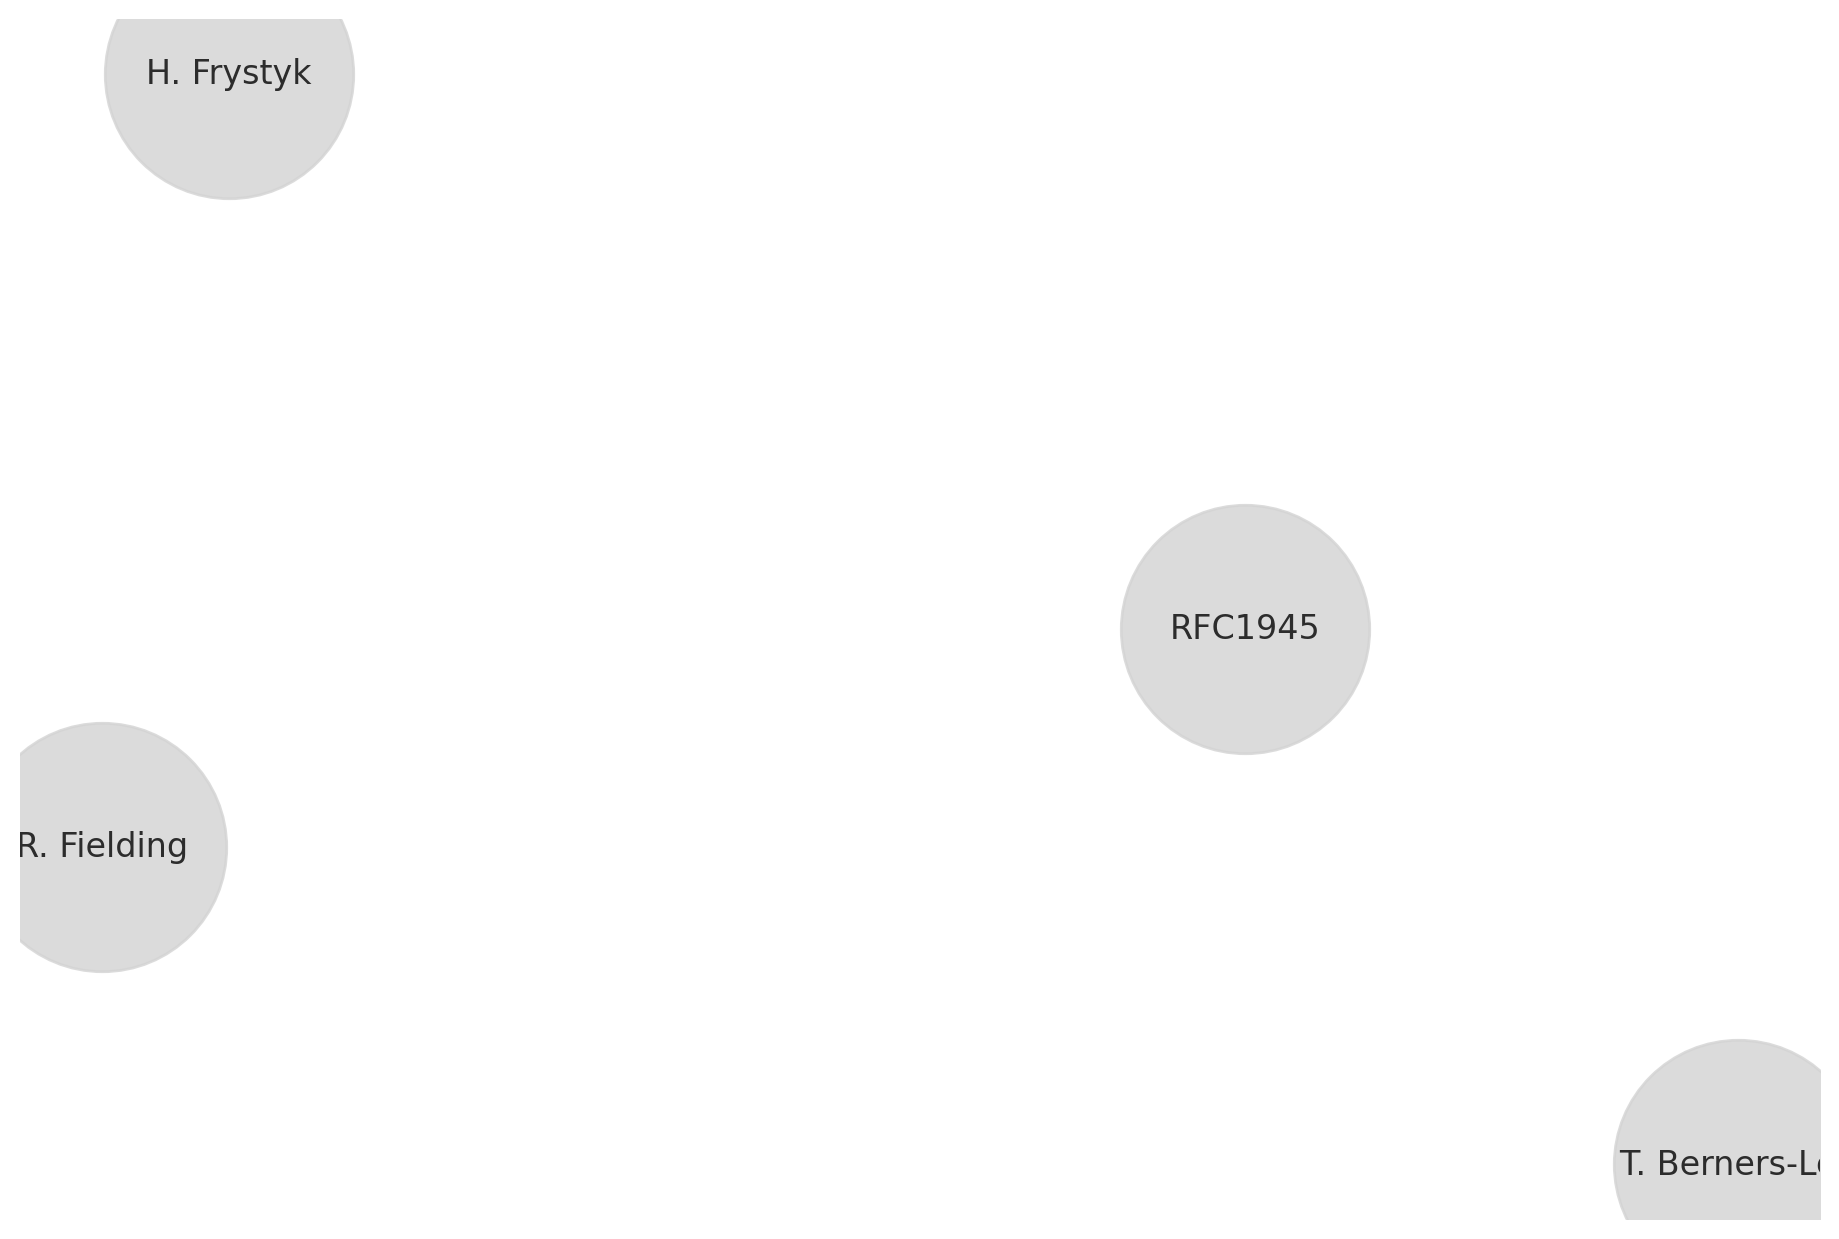

In [16]:
graph.show()

## Adding edges to the graph

We add an edge between the standards and the author for each author.

In [17]:
G_rfc1945.add_edges_from(
    [(rfc1945_metadata["doc_id"], author) for author in rfc1945_metadata["authors"]]
)
print(G_rfc1945.edges(data=True))

[('RFC1945', 'T. Berners-Lee', {}), ('RFC1945', 'R. Fielding', {}), ('RFC1945', 'H. Frystyk', {})]


## Adding edges to the graph

In [18]:
%%capture graph
nx.draw(
    G_rfc1945,
    pos=nx.random_layout(G_rfc1945, seed=0),
    with_labels=True,
    node_color="lightgray",
    node_size=8000,
    alpha=0.8,
)

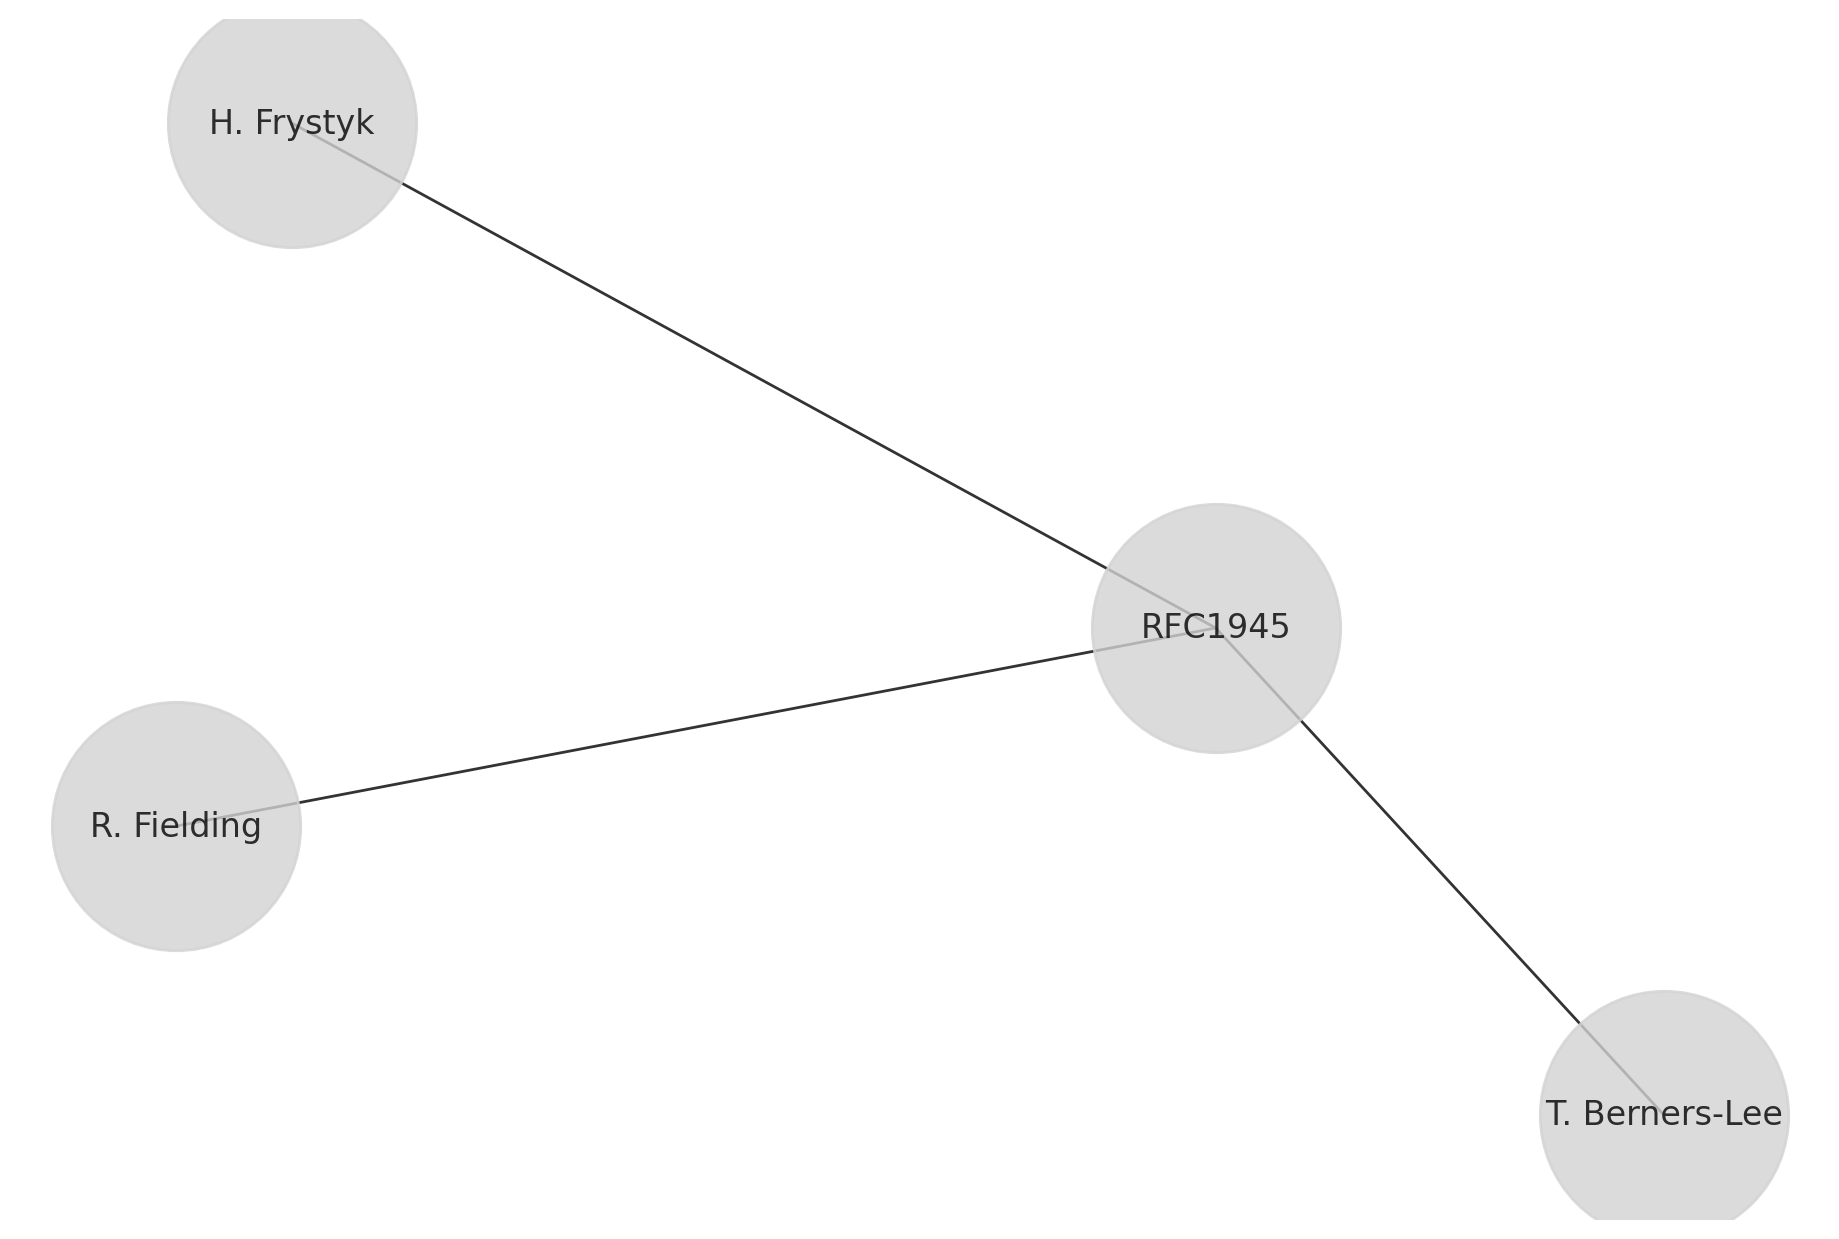

In [19]:
graph.show()

## Properties of this graph

This graph has interesting properties:

- There are two types of nodes: standards and authors.
- The edges connect authors and standards respectively.
- There are no edges between nodes of the same type.
- Thus, it is a bipartite graph and we can draw it as such.

In [20]:
from networkx.algorithms import bipartite

bipartite.is_bipartite(G_rfc1945)

True

## Draw the graph as a bipartite graph

In [21]:
%%capture graph


def color_nodes(G):
    colors = []
    for node in G.nodes():
        if node.startswith("RFC"):
            colors.append("orange")
        else:
            colors.append("lightgray")
    return colors


nx.draw(
    G_rfc1945,
    pos=nx.bipartite_layout(G_rfc1945, bipartite.sets(G_rfc1945)[1]),
    with_labels=True,
    node_color=color_nodes(G_rfc1945),
    node_size=4000,
    alpha=0.8,
)

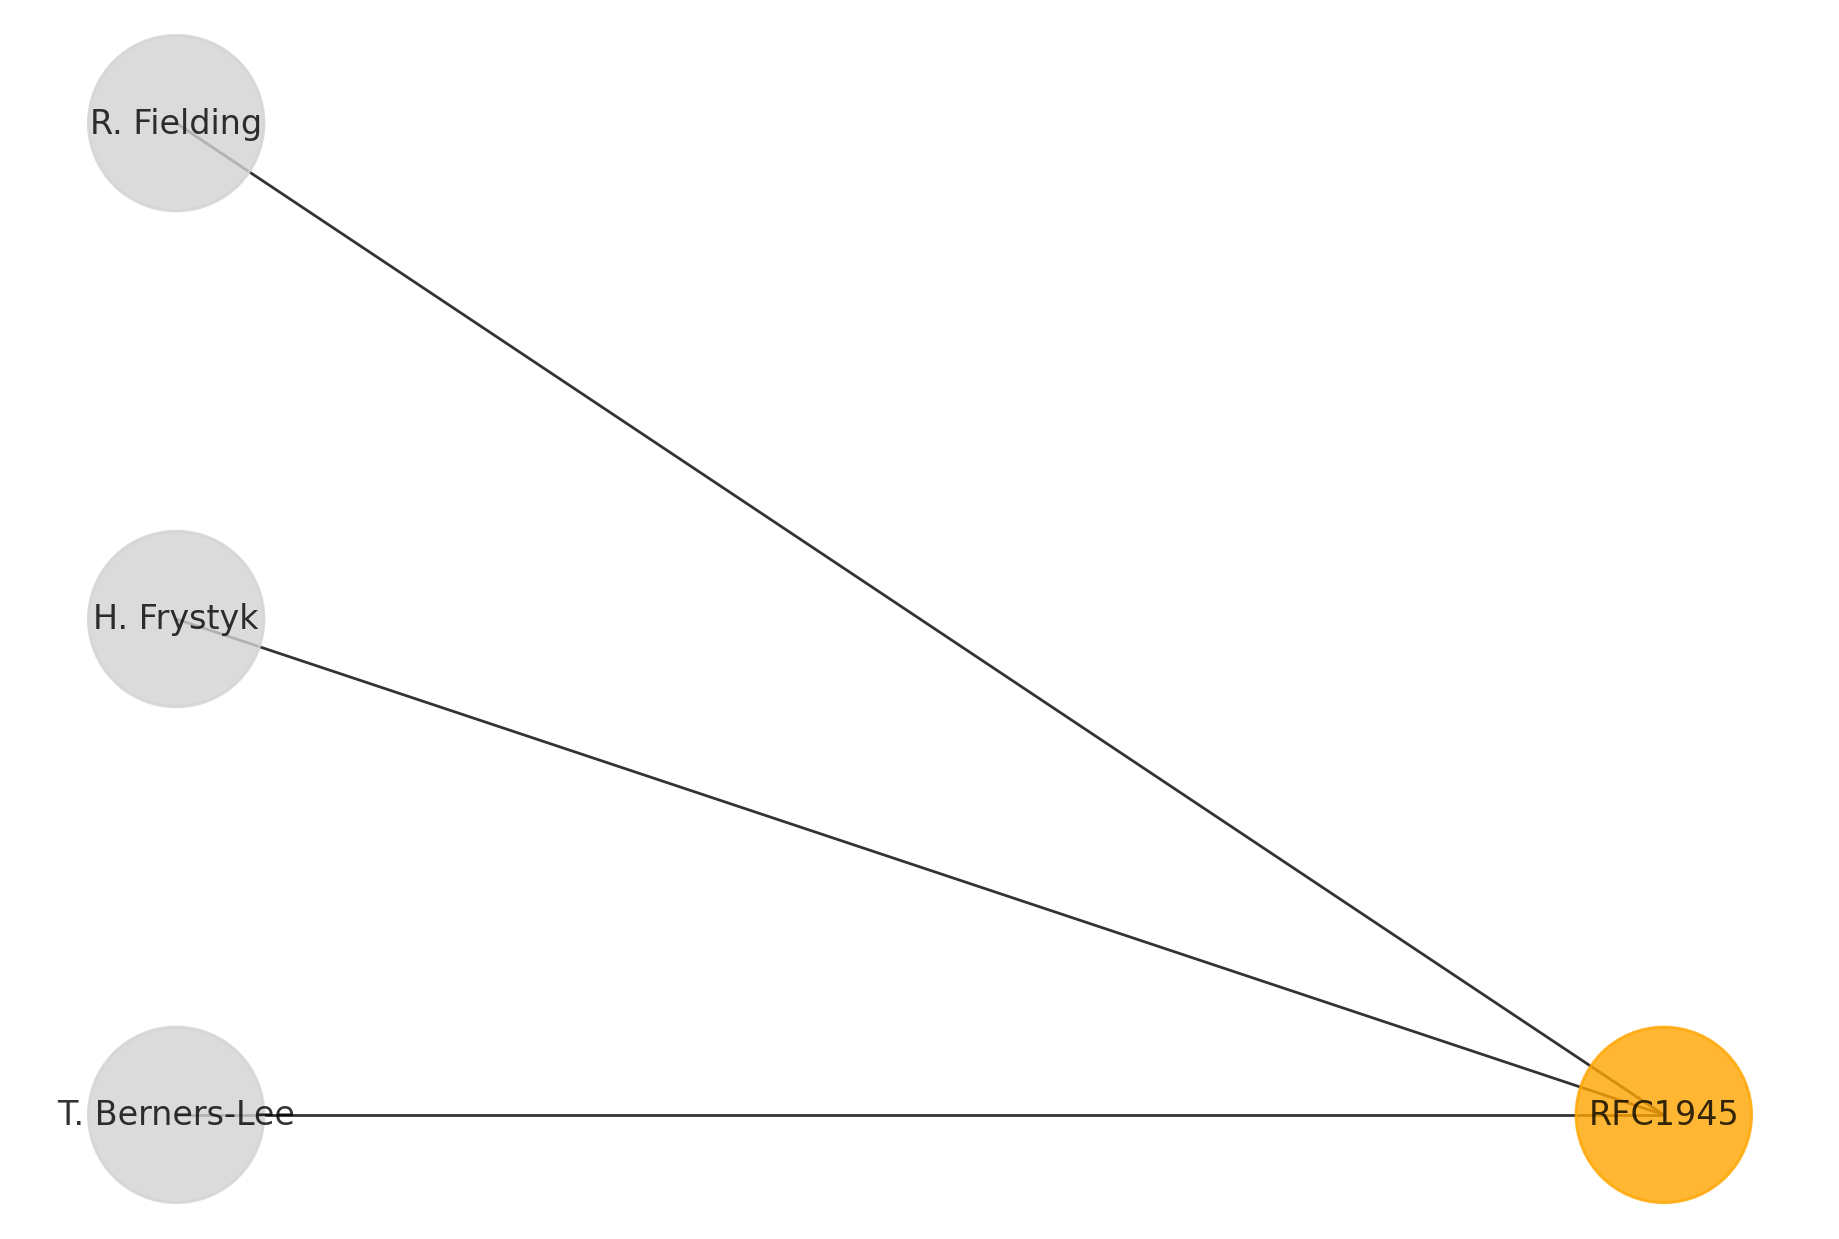

In [22]:
graph.show()

## Adding more standards by Tim Berners-Lee to the graph

The IETF provides a database of all RFCs and their authors. We can use this to add all RFCs authored or co-authored by Tim Berners-Lee. See [datatracker.ietf.org/person/timbl@w3.org](https://datatracker.ietf.org/person/timbl@w3.org)

![Screenshot of <https://datatracker.ietf.org/person/timbl@w3.org> taken at 9.12.22](images/datatracker.ietf.org_person_timbl_w3.org.png)

## Adding more standards by Tim Berners-Lee to the graph

In [23]:
rfcs_by_tbl_metadata = [
    json.loads(requests.get(f"https://www.rfc-editor.org/rfc/{rfc}.json").content)
    for rfc in [
        "rfc1630",
        "rfc1738",
        "rfc1866",
        "rfc2068",
        "rfc2396",
        "rfc2616",
        "rfc3986",
    ]
]
G_tbl = nx.Graph()
for rfc in rfcs_by_tbl_metadata:
    for author in rfc["authors"]:
        G_tbl.add_edge(rfc["doc_id"], author)

## Adding more standards by Tim Berners-Lee to the graph

In [24]:
%%capture graph
nx.draw(
    G_tbl,
    pos=nx.bipartite_layout(G_tbl, bipartite.sets(G_tbl)[1]),
    with_labels=True,
    node_color=color_nodes(G_tbl),
    node_size=4000,
    alpha=0.8,
)

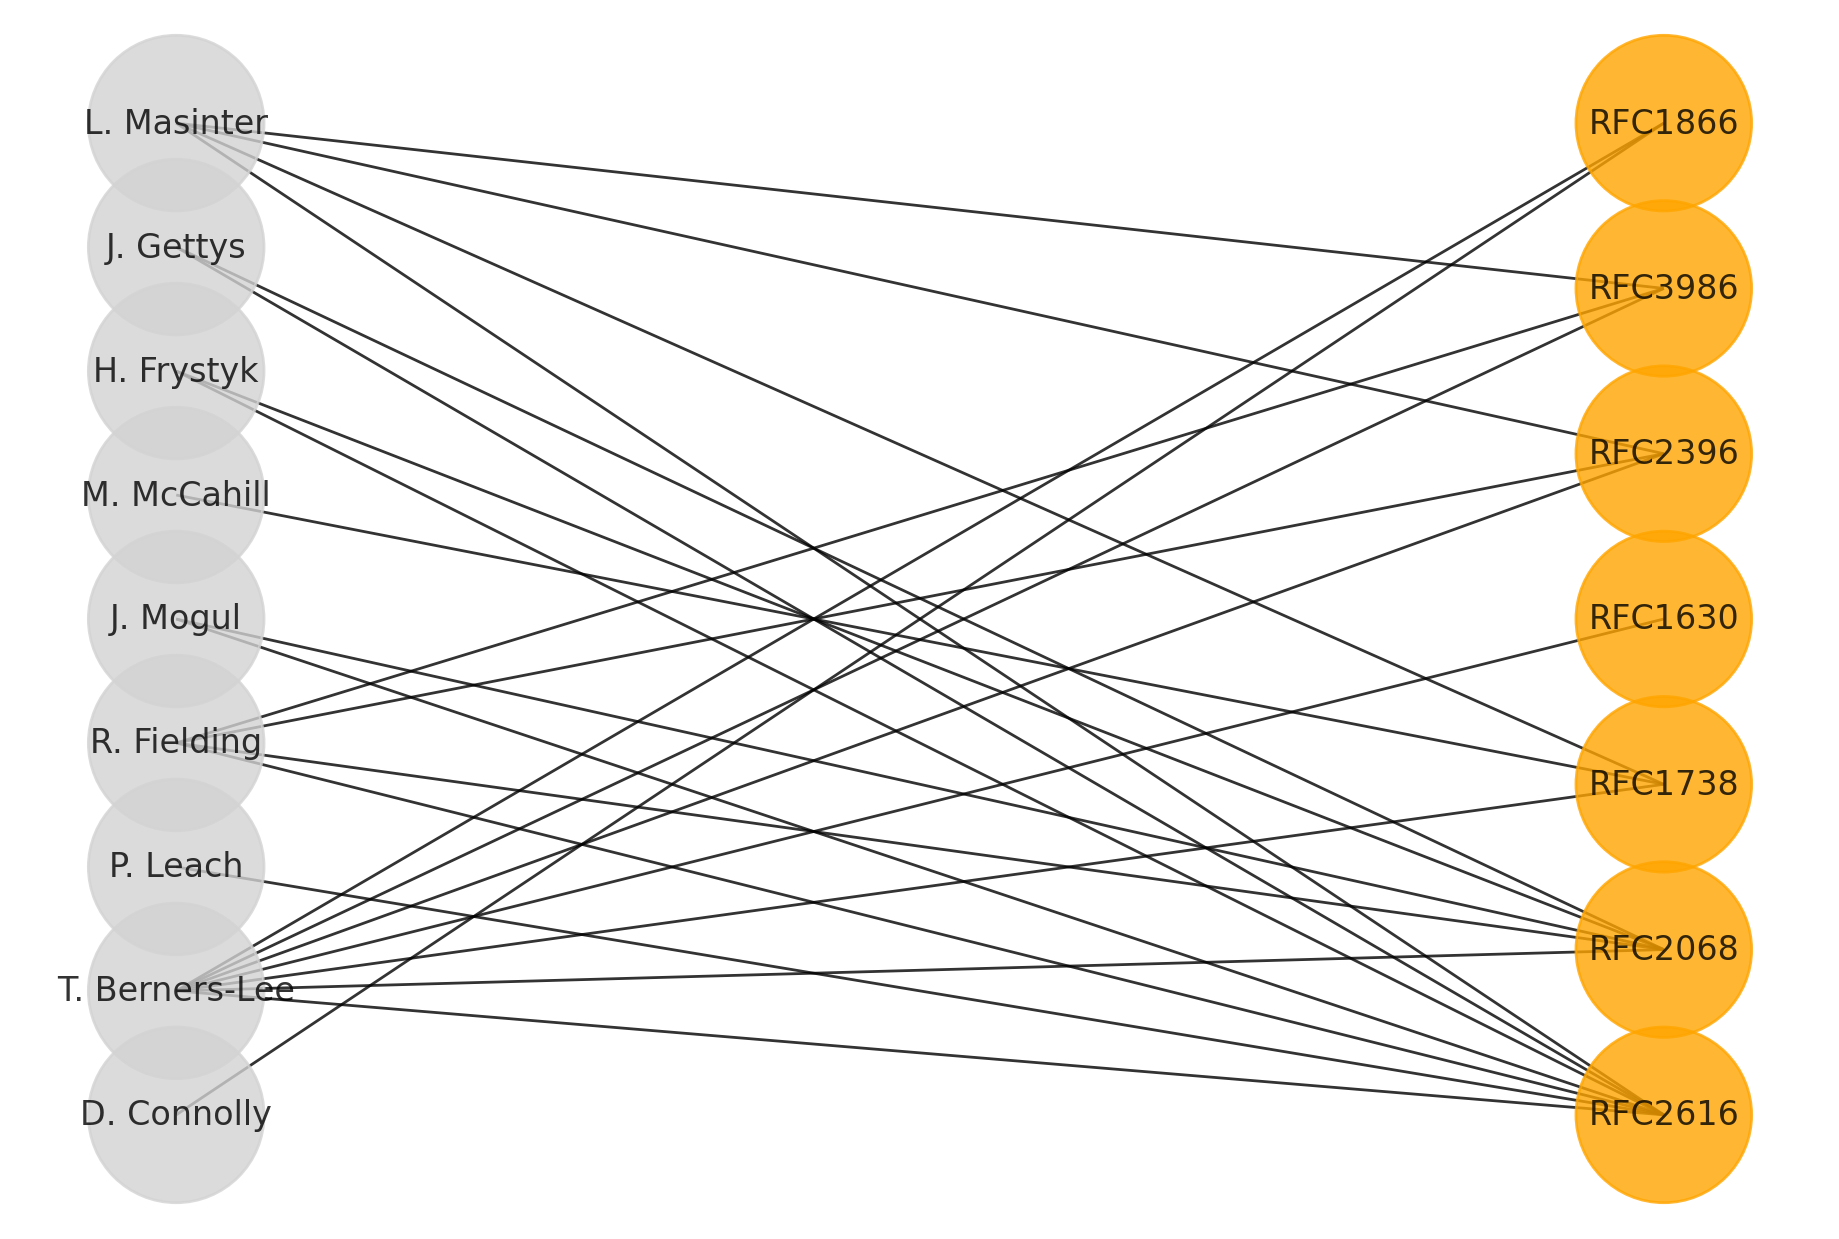

In [25]:
graph.show()

## From authorship to co-authorship

- Our bipartite graph tells us who wrote which RFC. It can tell us who wrote the most RFCs. This is something that we can do with a spreadsheet. We don't need a graph for that.
- We can also turn the bipartite graph into a unipartite graph to find out who co-authored the most RFCs. This is something that we can't do with a spreadsheet. For this we need a relational data model, for example a graph.

## Turning a bipartite graph into a unipartite graph


- To turn our bipartite authorship graph into a unipartite co-authorship graph, we draw edges between all pairs of authors who co-authored a RFC. This is often referred to as projection.
- RFC 1945 was authored by Tim Berners-Lee, Roy Fielding and Henrik Frystyk Nielsen. This means that we draw a graph with edges between Tim Berners-Lee and Roy Fielding, Tim Berners-Lee and Henrik Frystyk Nielsen, and Roy Fielding and Henrik Frystyk Nielsen.

## Co-authors of RFC 1945

In [26]:
%%capture graph
G_rfc1945_uni = bipartite.projected_graph(G_rfc1945, bipartite.sets(G_rfc1945)[1])

nx.draw(
    G_rfc1945_uni,
    with_labels=True,
    node_color="lightgray",
    node_size=4000,
    alpha=0.8,
)

for edge in G_rfc1945_uni.edges():
    G_rfc1945_uni.edges[edge]["rfc"] = "RFC1945"

nx.draw_networkx_edge_labels(
    G_rfc1945_uni,
    pos=nx.spring_layout(G_rfc1945_uni, seed=0),
    edge_labels=nx.get_edge_attributes(G_rfc1945_uni, "rfc"),
).clear()

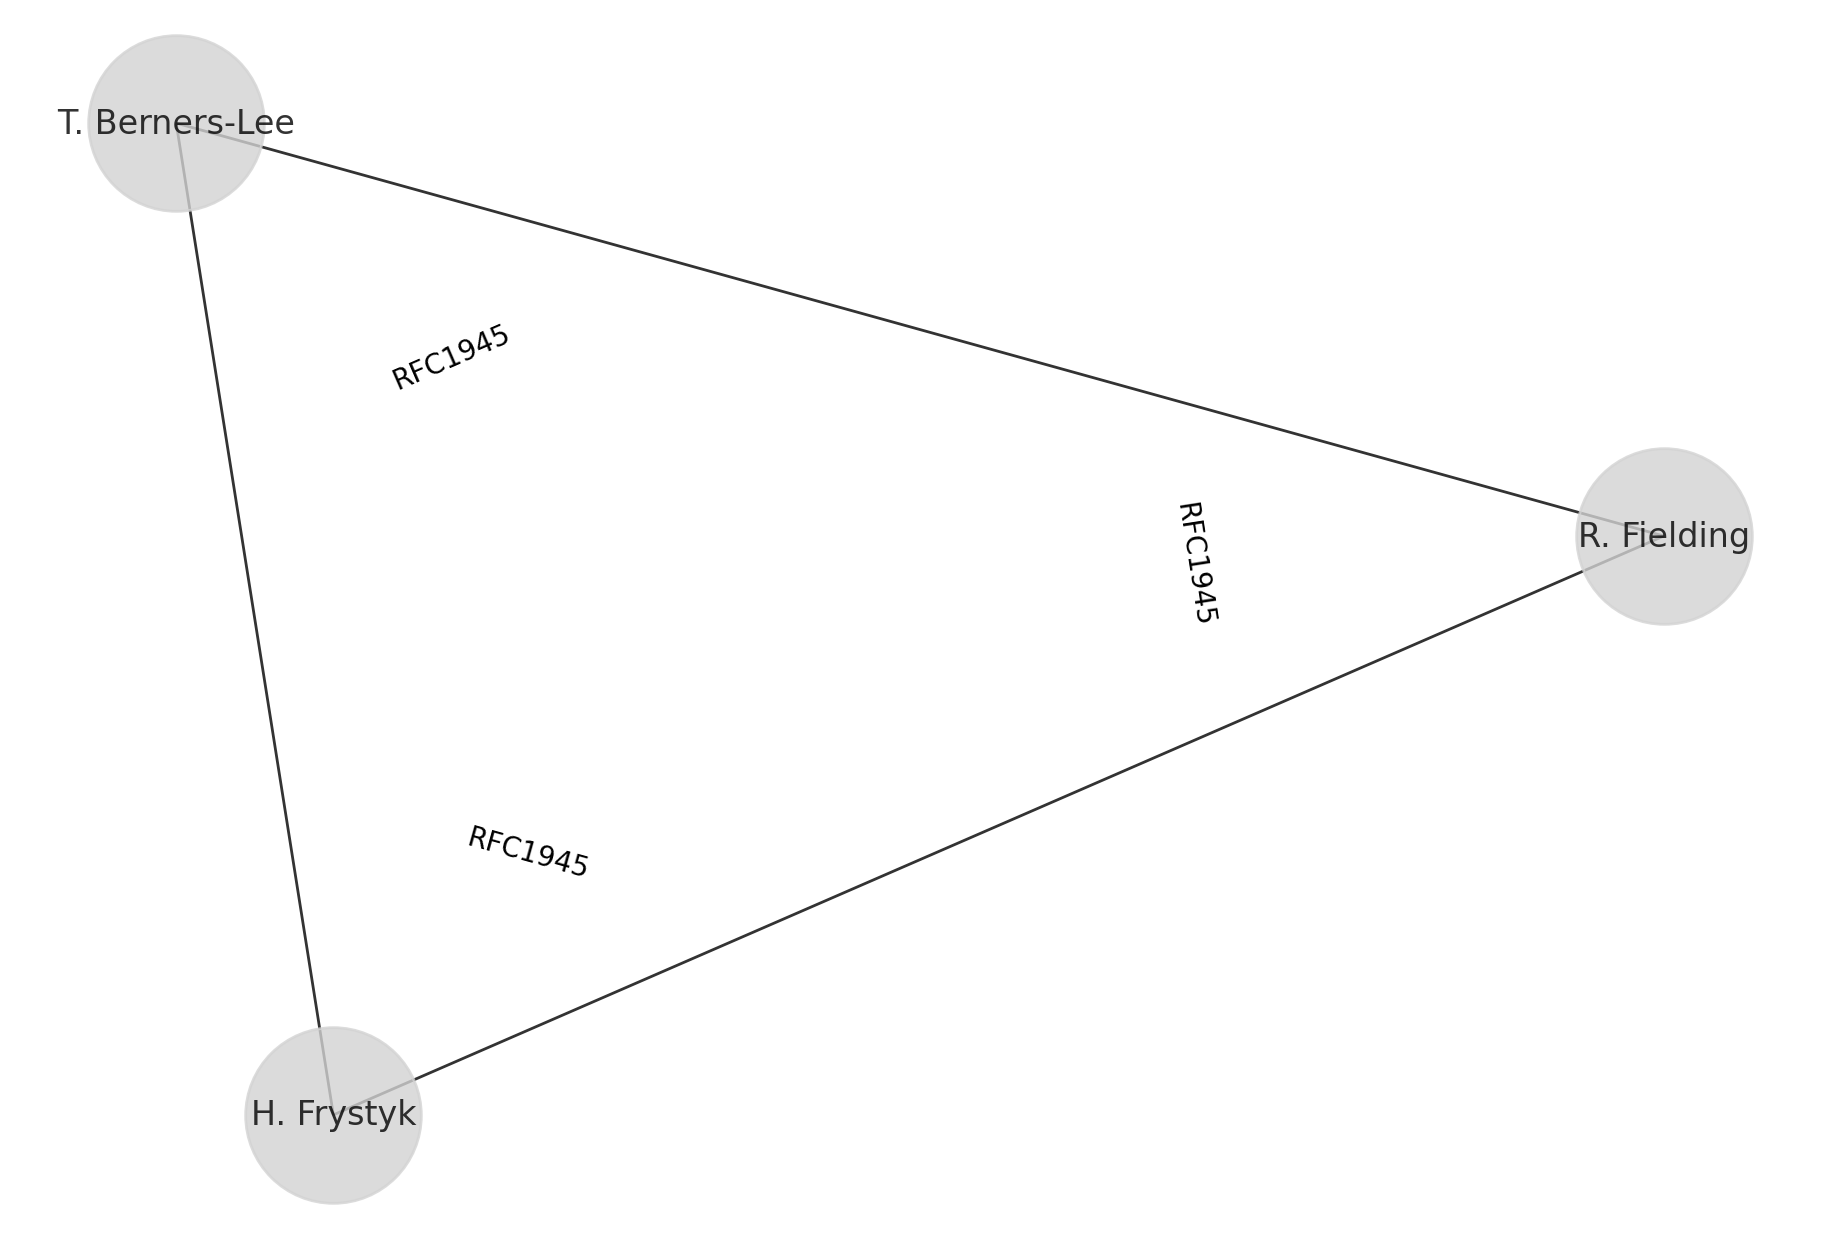

In [27]:
graph.show()

## All co-authors of Tim Berners-Lee

- We repeat this process for all RFCs authored or co-authored by Tim Berners-Lee (i.e., for RFC 1630, RFC 1738, RFC 1866, RFC 2068, RFC 2396, RFC 2616, and RFC 3986).
- Thus, we obtain a graph with all of Tim Berners-Lee's co-authors.

## All co-authors of Tim Berners-Lee

In [28]:
%%capture graph
G_tbl_uni = bipartite.weighted_projected_graph(G_tbl, bipartite.sets(G_tbl)[1])

# draw with circular layout
pos = nx.circular_layout(G_tbl_uni)
nx.draw(
    G_tbl_uni,
    pos=pos,
    with_labels=True,
    node_color="lightgray",
    node_size=4000,
    alpha=0.8,
)

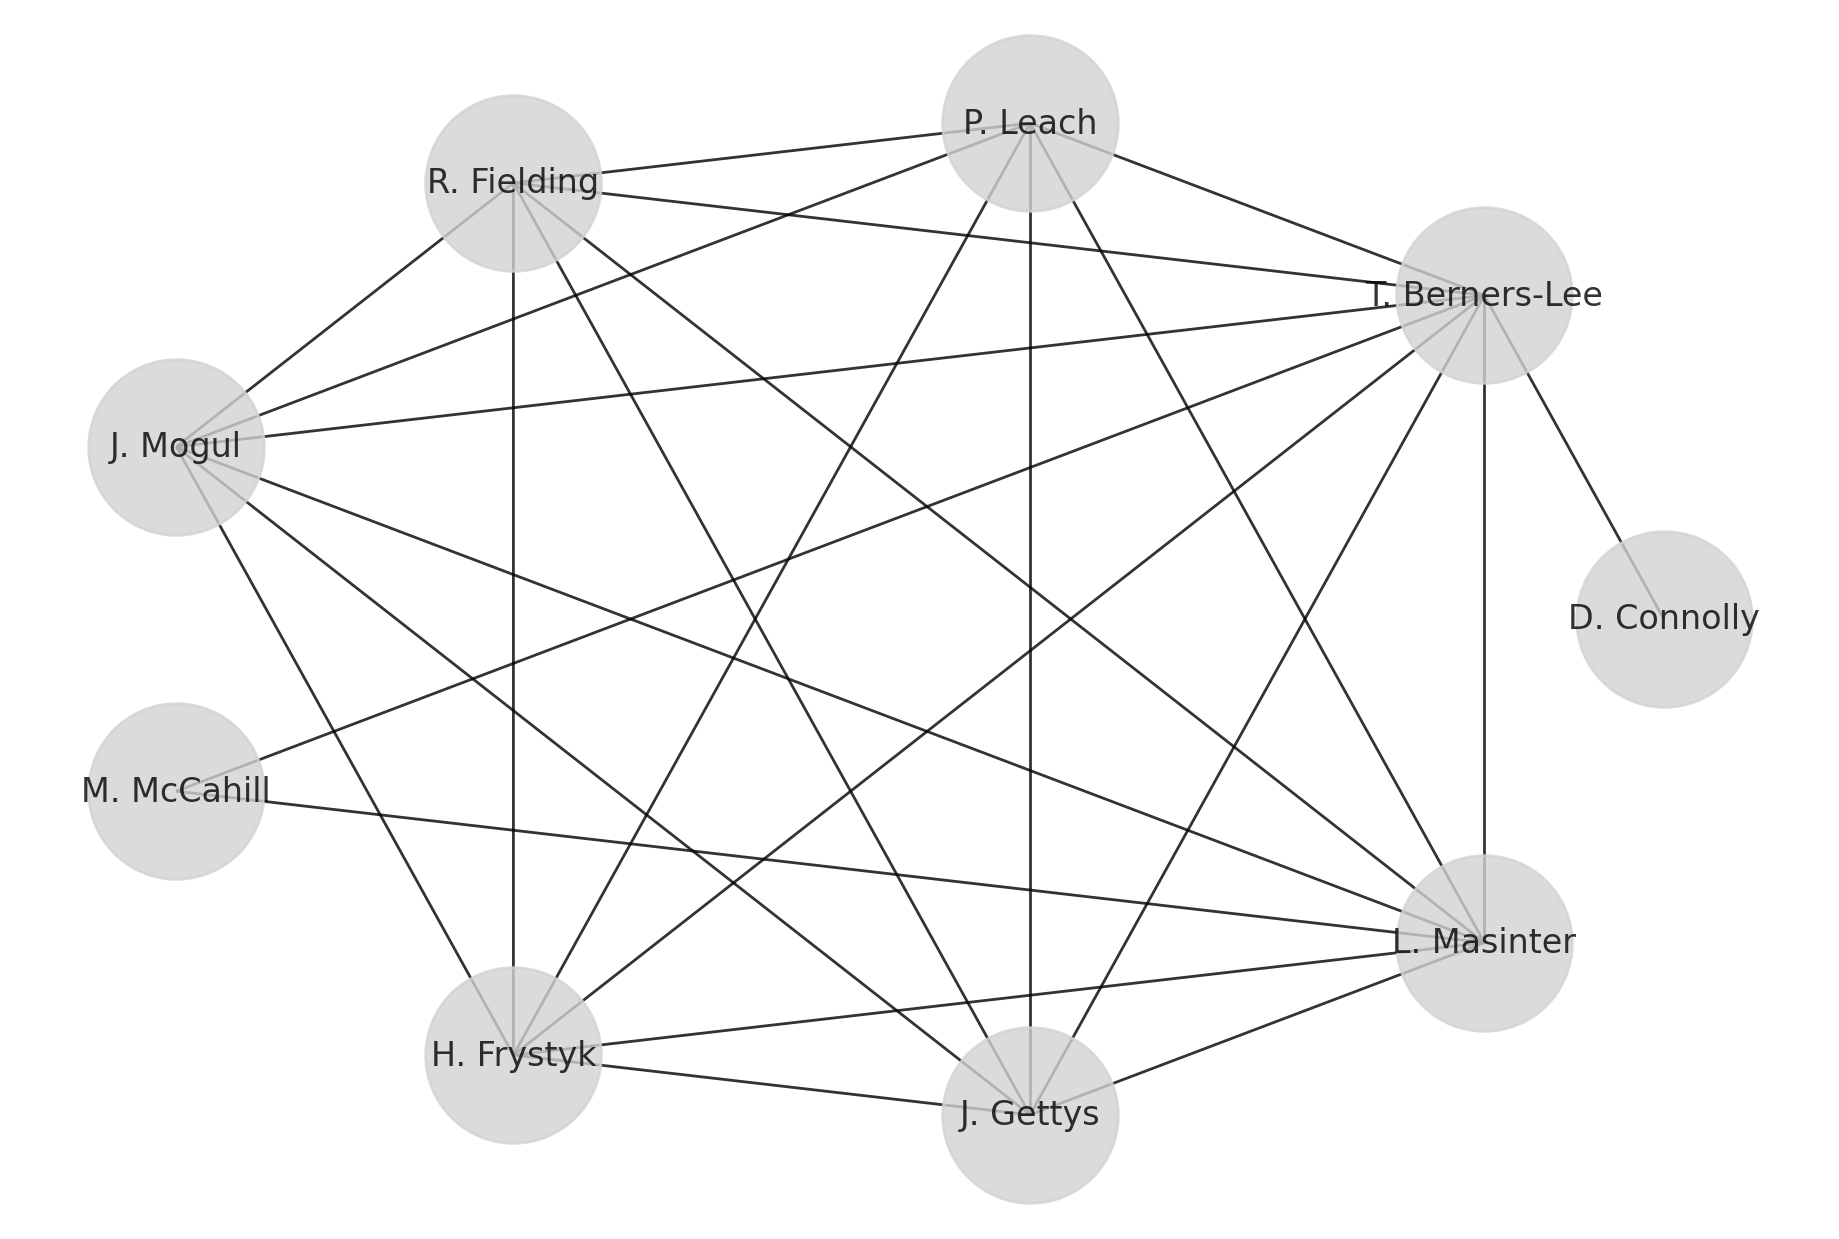

In [29]:
graph.show()

## All co-authors of Tim Berners-Lee

- We can indicate the number of co-authored RFCs by the thickness of the edges.

In [30]:
%%capture graph
nx.draw(
    G_tbl_uni,
    pos=pos,
    with_labels=True,
    node_color="lightgray",
    node_size=4000,
    alpha=0.8,
    width=[d["weight"] for (u, v, d) in G_tbl_uni.edges(data=True)],
)

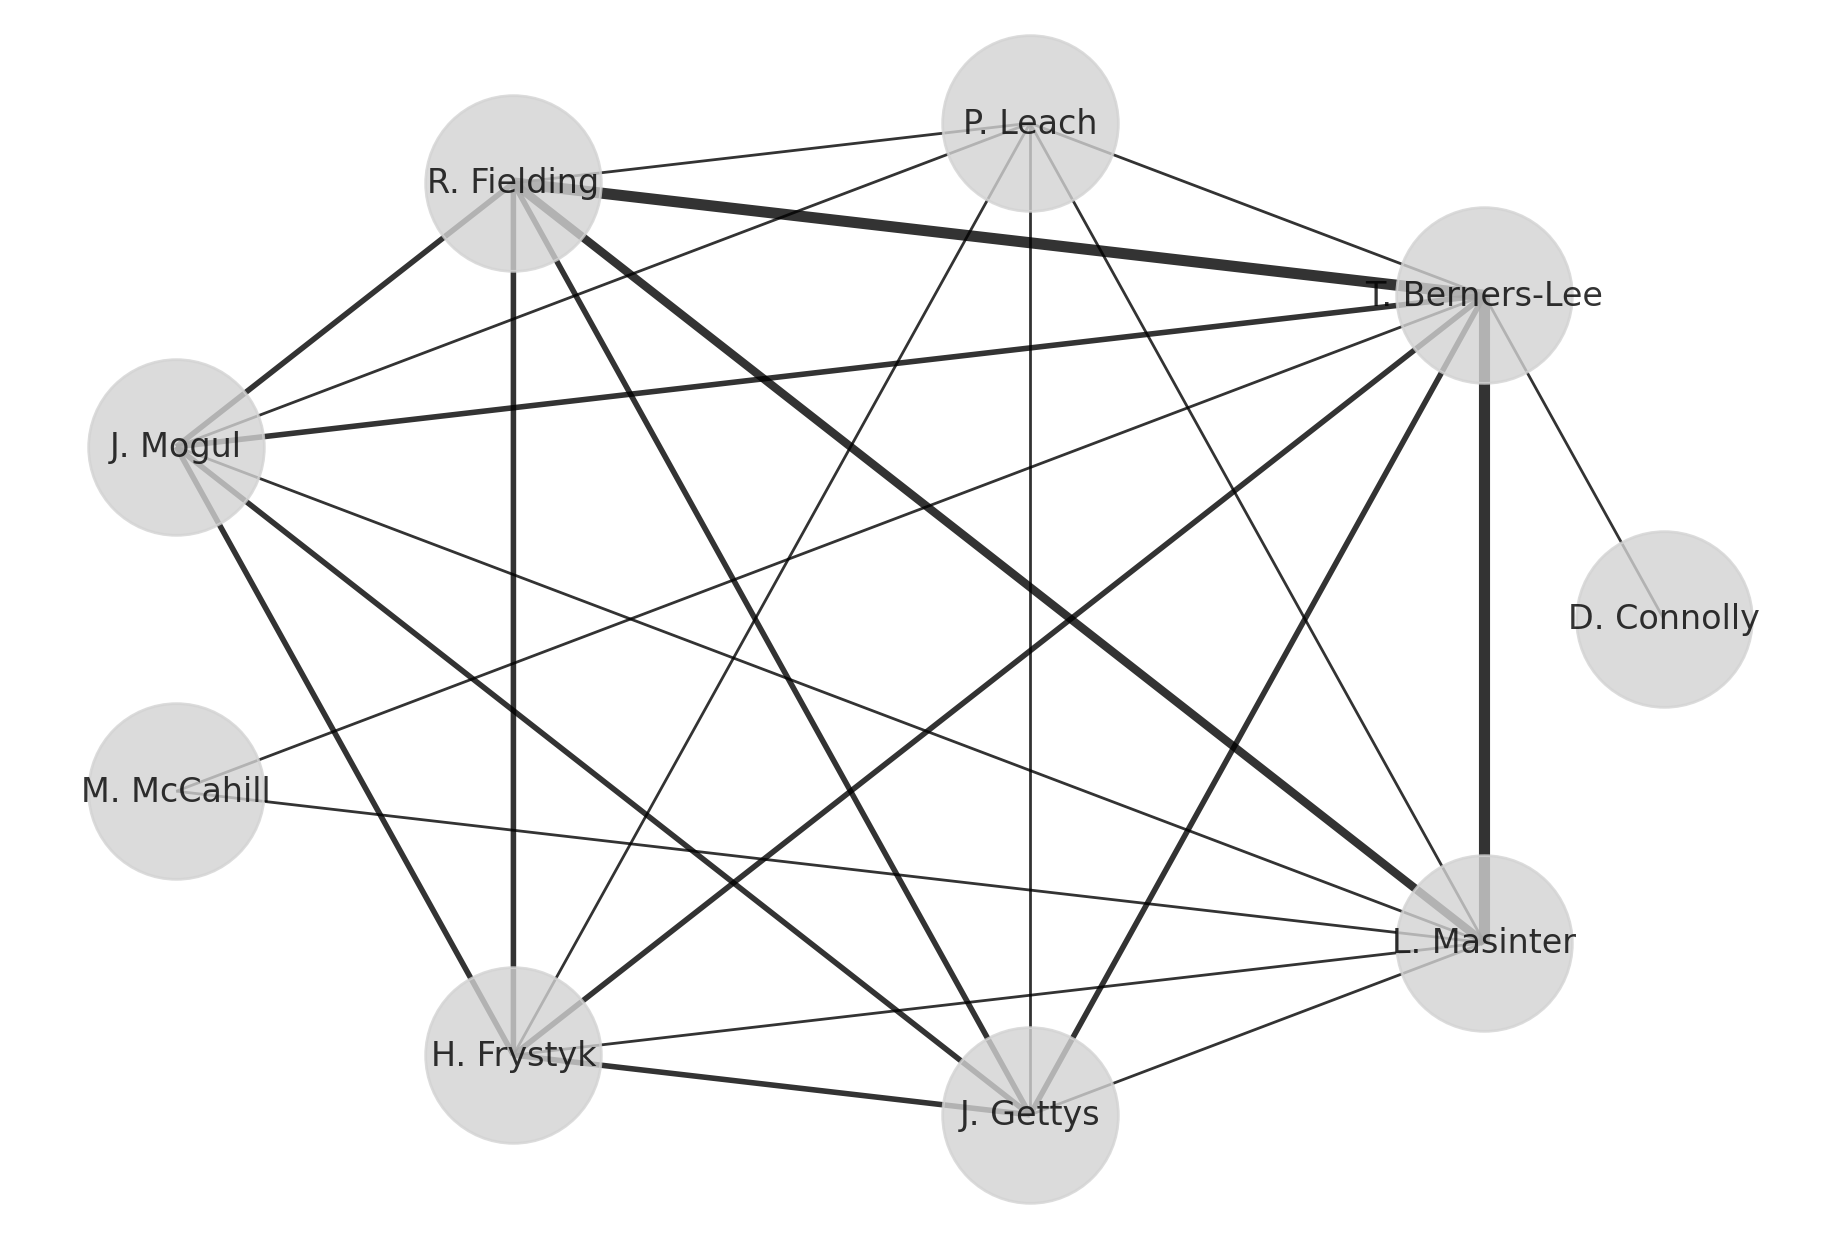

In [31]:
graph.show()

## All co-authors of Tim Berners-Lee

- Tim Berners-Lee has collaborated most with Roy Fielding and Larry Masinter (four times each).
- But are they equally important? It is hard to tell from this graph.

In [32]:
%%capture graph

nx.draw(
    G_tbl_uni,
    pos,
    with_labels=True,
    node_color="lightgray",
    node_size=3000,
    alpha=0.8,
    width=[d["weight"] for (u, v, d) in G_tbl_uni.edges(data=True)],
)
labels = nx.get_edge_attributes(G_tbl_uni, "weight")
labels = {k: v for k, v in labels.items() if v > 1}
nx.draw_networkx_edge_labels(G_tbl_uni, pos, edge_labels=labels).clear()

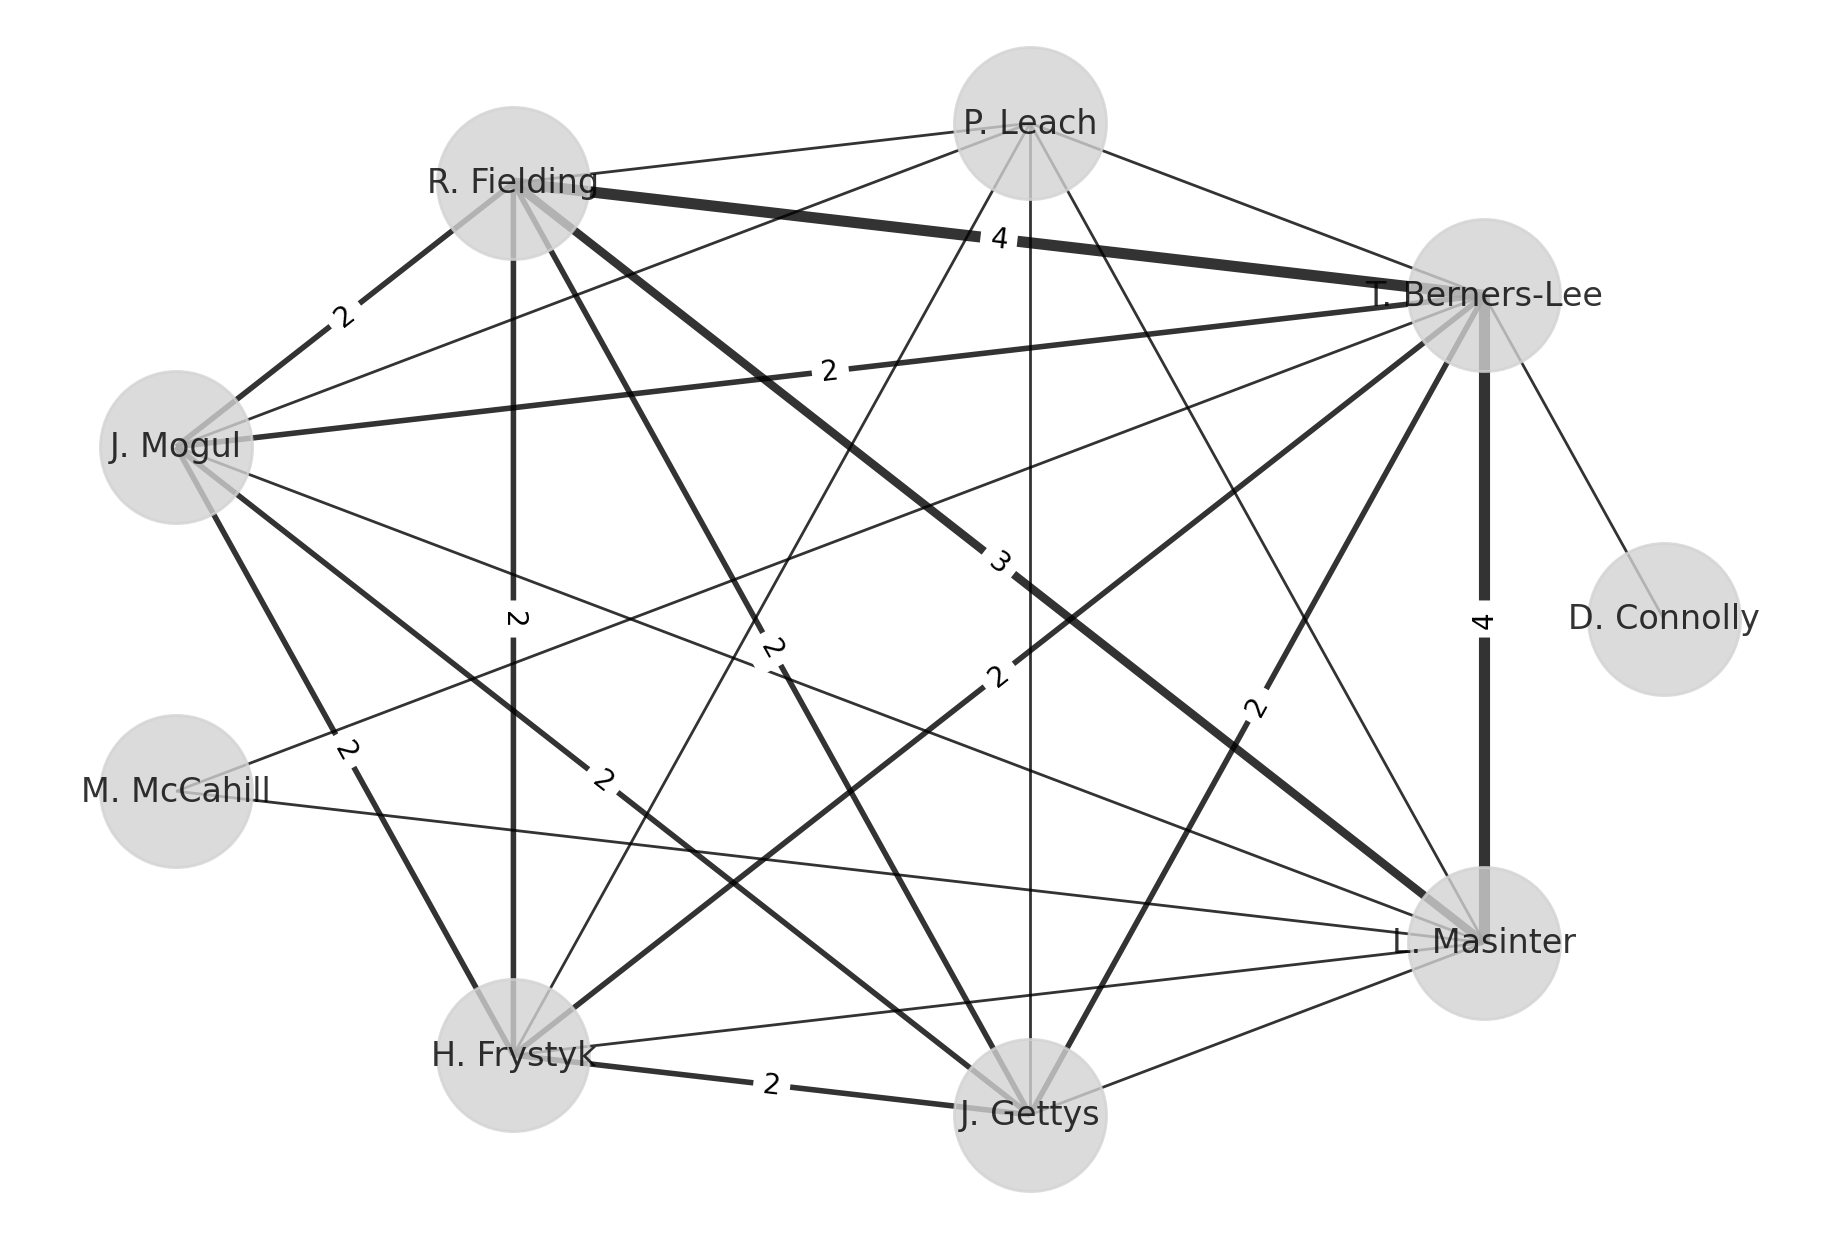

In [33]:
graph.show()

## Analyzing the graph

A very basic indicator of the importance of a node is its degree (i.e., the number of edges). The degree centrality for each author is the proportion of co-authors to which the author is connected. It gives an indication of how important an author is in the network. We selected only RFCs that were (co)authored by Tim Berners-Lee (a so-called ego network). He has collaborated with all other authors, so the degree centrality of Tim Berners-Lee himself is 1.

$$
\text{centrality degree}(author) = \frac{\text{degree}(author)}{\text{total number of authors} - 1}
$$

In [34]:
import pandas as pd

degree_centrality = pd.DataFrame(
    sorted(
        nx.degree_centrality(G_tbl_uni).items(),
        key=lambda x: x[1],
        reverse=True,
    ),
    columns=["author", "degree centrality"],
)

In [35]:
degree_centrality

,author,degree centrality
0,T. Berners-Lee,1.000
1,L. Masinter,0.875
2,P. Leach,0.750
3,R. Fielding,0.750
4,J. Mogul,0.750
5,H. Frystyk,0.750
6,J. Gettys,0.750
7,M. McCahill,0.250
8,D. Connolly,0.125


## Analyzing a bigger network

We analyze all rfcs that were co-authored between 1994 and 1999. The network is much bigger and more complex. 

In [36]:
import os
import subprocess


def download_rfc_json_files():
    command = f"rsync -zarv --include=*/ --include=*.json --exclude=* --progress --stats ftp.rfc-editor.org::everything-ftp ../data/ftp.rfc-editor.org"
    subprocess.run(command.split())


def get_all_files_in_path(path, extension):
    return [
        os.path.join(path, file)
        for file in os.listdir(path)
        if file.endswith(extension)
    ]


def concatinate_json_files(json_files):
    return [json.load(open(file)) for file in json_files]


def convert_rfcs_to_dataframe(rfc_data):
    list_of_authors = [
        {"doc_id": rfc["doc_id"], "author": author, "pub_date": rfc["pub_date"]}
        for rfc in rfc_data
        for author in rfc["authors"]
    ]
    authors = pd.DataFrame(list_of_authors)
    authors = authors.astype(
        {
            "doc_id": "string",
            "author": "category",
            "pub_date": "datetime64[ns]",
        }
    )
    return authors


if not os.path.exists("../data/authors.feather"):
    download_rfc_json_files()
    list_of_rfc_json_file_paths = get_all_files_in_path(
        "../data/ftp.rfc-editor.org/in-notes/", ".json"
    )
    rfc_data = concatinate_json_files(list_of_rfc_json_file_paths)
    authors = convert_rfcs_to_dataframe(rfc_data)
    authors.to_feather("../data/authors.feather")
else:
    authors = pd.read_feather("../data/authors.feather")

authors_94_99 = authors[authors["pub_date"].dt.year.between(1994, 1999)]

In [37]:
%%capture graph
G_94_99 = nx.Graph()
G_94_99.add_edges_from(authors_94_99[["author", "doc_id"]].values)
G_94_99_uni = bipartite.weighted_projected_graph(
    G_94_99, nodes=authors_94_99["author"].unique()
)

nx.draw(
    G_94_99_uni,
    pos=nx.spring_layout(G_94_99_uni, seed=1),
    with_labels=False,
    node_color="lightgray",
    node_size=2,
    alpha=0.1,
    width=[d["weight"] for (u, v, d) in G_94_99_uni.edges(data=True)],
)
nx.info(G_94_99_uni)

'Graph with 1141 nodes and 2201 edges'

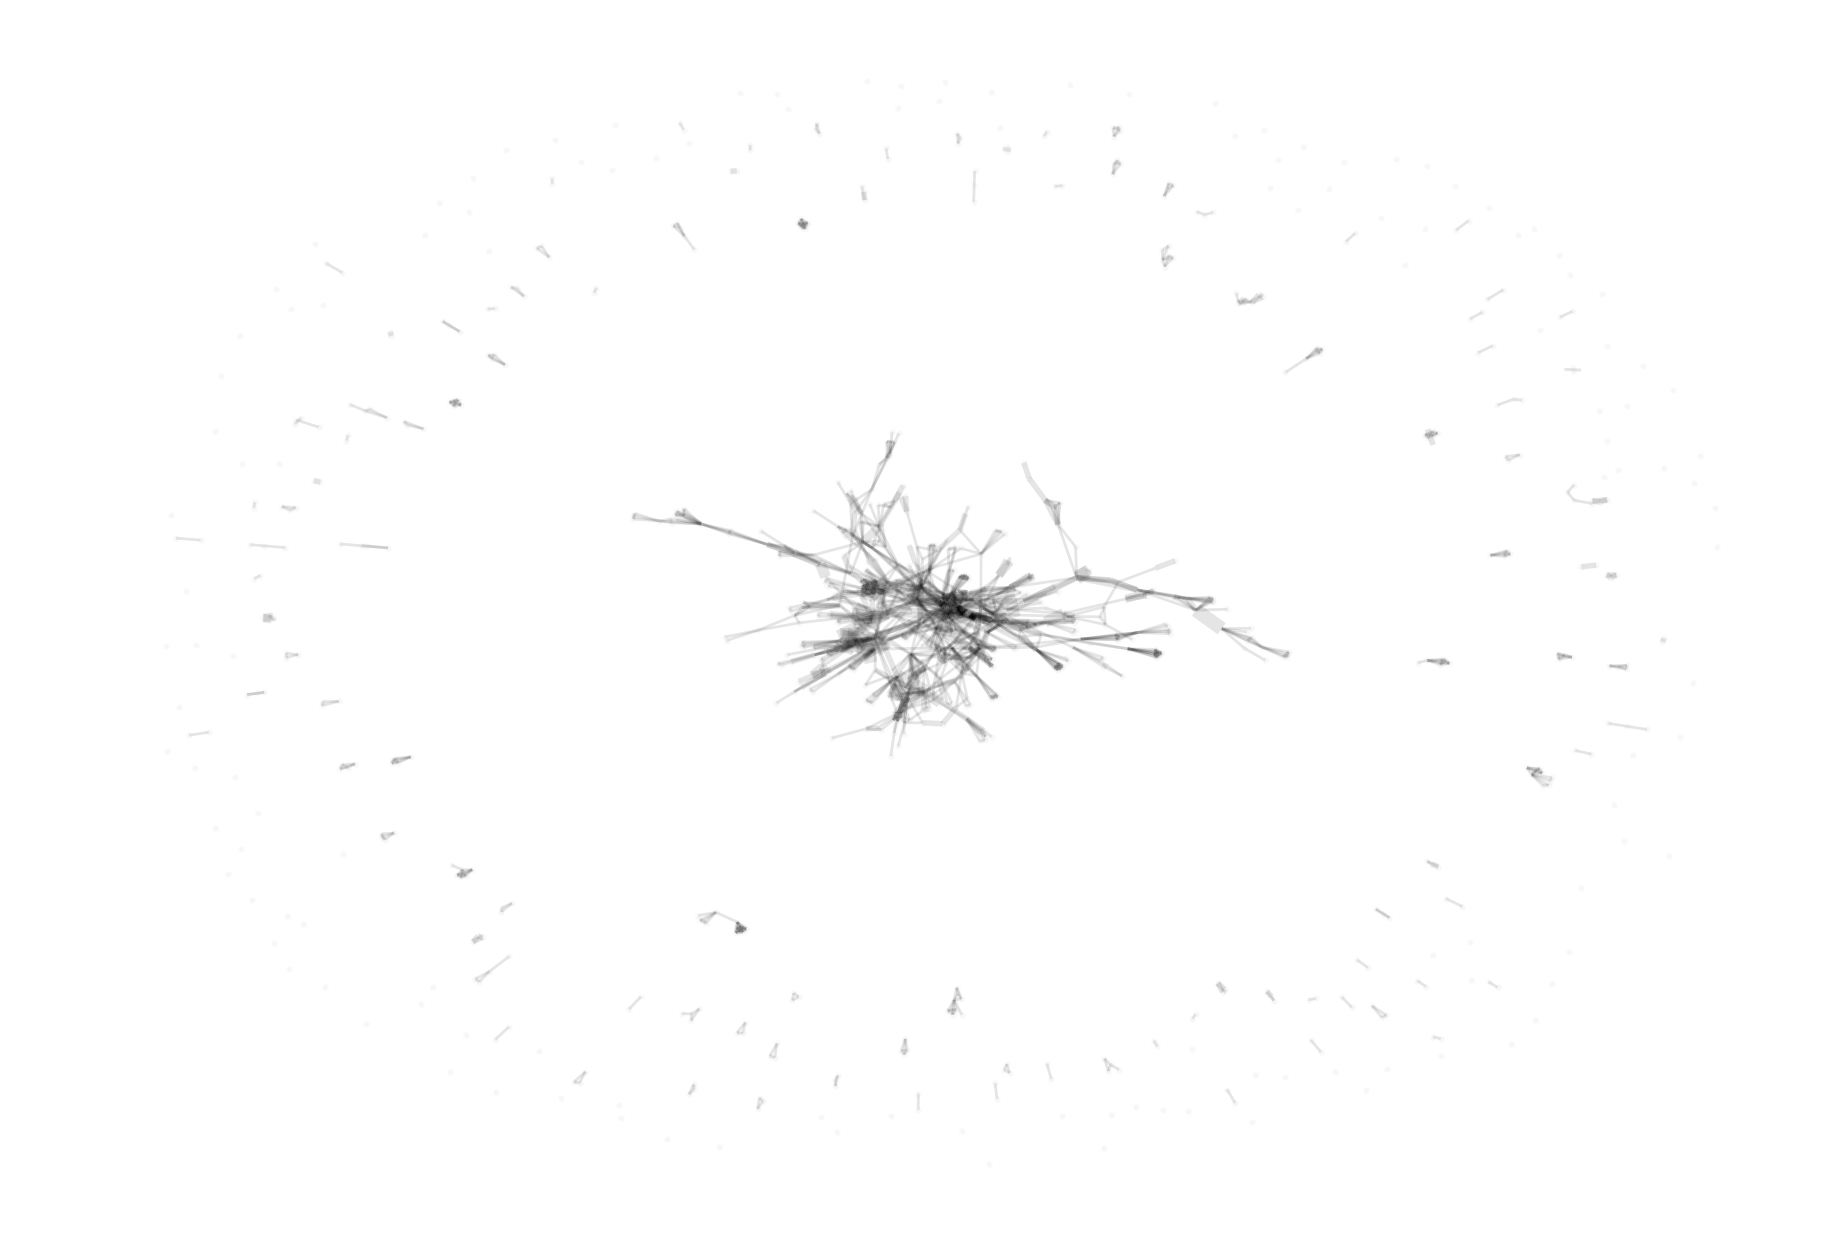

In [38]:
graph.show()

## A word about graph components

- A component is the set of nodes that are connected to each other.
- A graph can have multiple components.
- Each component must be analyzed separately.
- Our graph has 207 components. 
- Most of the components are very small (243 have less than 15 authors, 133 have only 1 author).
- Over 57% of the authors are in the largest component.
- We will focus on the largest connected component.

In [39]:
G_94_99_uni_components = sorted(
    nx.connected_components(G_94_99_uni), key=len, reverse=True
)
G_94_99_uni_components_sizes = [len(c) for c in G_94_99_uni_components]
pd.Series(G_94_99_uni_components_sizes).describe()

count    244.000000
mean       4.676230
std       41.580277
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max      651.000000
dtype: float64

In [40]:
pd.Series(G_94_99_uni_components_sizes)[
    pd.Series(G_94_99_uni_components_sizes) < 2
].count()

133

## Analyzing the largest connected component

In [41]:
%%capture graph
G_94_99_uni_giant = G_94_99_uni.subgraph(G_94_99_uni_components[0])
nx.draw(
    G_94_99_uni_giant,
    pos=nx.spring_layout(G_94_99_uni_giant, seed=1),
    with_labels=False,
    node_color="lightgray",
    node_size=2,
    alpha=0.1,
    width=[d["weight"] for (u, v, d) in G_94_99_uni_giant.edges(data=True)],
)
nx.info(G_94_99_uni_giant)

'Graph with 651 nodes and 1758 edges'

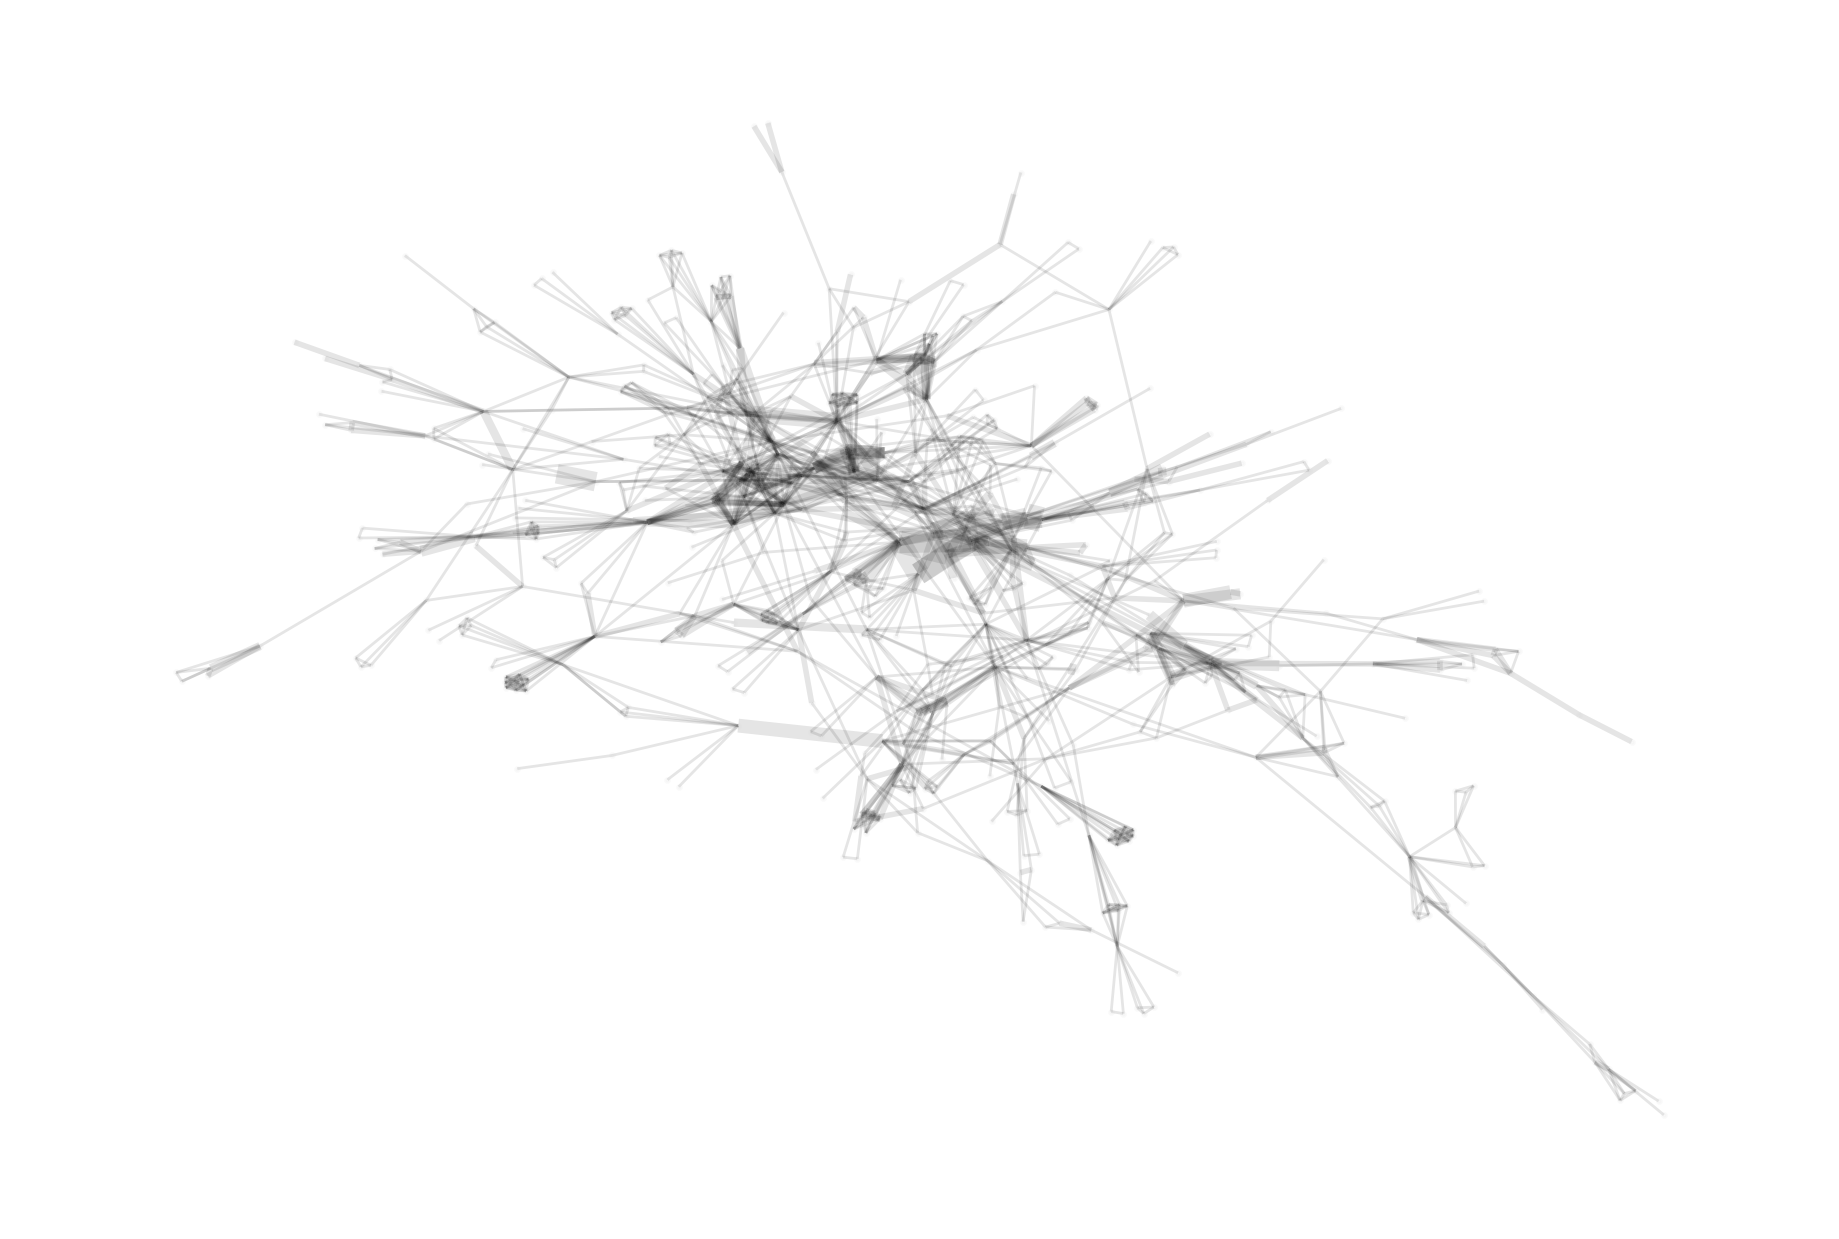

In [42]:
graph.show()

## Analysis of the largest related component

- We have 651 authors in the largest component.
- The degree distribution is skewed to the right. Most authors have a low degree. A few authors have a very high degree.
- This means: most authors are not very well connected.
- We can assume that there are several communities (i.e., groups of authors that are well connected).
- How can we find these communities?

In [43]:
pd.Series([d for n, d in G_94_99_uni_giant.degree()]).median()

4.0

In [44]:
nx.density(G_94_99_uni_giant)

0.008309110244594116

## Analyzing the community structure

We use a community detection algorithm to identify communities in the graph.

In [45]:
from networkx.algorithms import community

G_94_99_uni_giant_communities = community.greedy_modularity_communities(
    G_94_99_uni_giant
)

nx.set_node_attributes(
    G_94_99_uni_giant,
    {c: i for i, com in enumerate(G_94_99_uni_giant_communities) for c in com},
    "community",
)

G_94_99_uni_giant_communities = pd.DataFrame(
    sorted(
        [(i, len(list(c))) for i, c in enumerate(G_94_99_uni_giant_communities)],
        key=lambda x: x[1],
        reverse=True,
    ),
    columns=["community", "author count"],
)

In [46]:
G_94_99_uni_giant_communities

,community,author count
0,0,96
1,1,86
2,2,60
3,3,59
4,4,46
5,5,36
6,6,34
7,7,32
8,8,30
9,9,27


## Analyzing the community structure

- How do we find the important members of the communities?
- We calculate centrality measures for all co-authors in the graph.

In [47]:
nx.set_node_attributes(
    G_94_99_uni_giant,
    nx.degree_centrality(G_94_99_uni_giant),
    "degree centrality",
)
nx.set_node_attributes(
    G_94_99_uni_giant,
    nx.betweenness_centrality(G_94_99_uni_giant),
    "betweenness centrality",
)
nx.set_node_attributes(
    G_94_99_uni_giant,
    nx.eigenvector_centrality(G_94_99_uni_giant),
    "eigenvector centrality",
)
nx.set_node_attributes(
    G_94_99_uni_giant,
    nx.pagerank(G_94_99_uni_giant),
    "pagerank",
)

G_94_99_uni_giant_author_measures = pd.DataFrame(
    sorted(
        [
            (
                node,
                data["degree centrality"],
                data["betweenness centrality"],
                data["eigenvector centrality"],
                data["pagerank"],
                data["community"],
            )
            for node, data in G_94_99_uni_giant.nodes(data=True)
        ],
        key=lambda x: x[1],
        reverse=True,
    ),
    columns=[
        "author",
        "degree centrality",
        "betweenness centrality",
        "eigenvector centrality",
        "pagerank",
        "community",
    ],
)

In [48]:
G_94_99_uni_giant_author_measures.round(3)

,author,degree centrality,betweenness centrality,eigenvector centrality,pagerank,community
0,S. Deering,0.051,0.121,0.282,0.007,0
1,Y. Rekhter,0.051,0.142,0.125,0.008,1
2,L. Zhang,0.045,0.052,0.259,0.005,0
3,F. Baker,0.043,0.134,0.090,0.006,0
4,V. Jacobson,0.042,0.076,0.261,0.005,0
...,...,...,...,...,...,...
646,C. Burton,0.002,0.000,0.000,0.000,4
647,M. Beadles,0.002,0.000,0.000,0.000,15
648,D. Perkins,0.002,0.000,0.000,0.001,16
649,T. Henderson,0.002,0.000,0.014,0.000,0


## A word about centrality measures


- Degree centrality: For finding very connected individuals, popular individuals, or individuals **who can quickly connect with a wider network**.
- Betweenness centrality: For finding individuals **who are likely to be the "bottleneck" in the network**, i.e., individuals who are likely to be the most important in connecting the network.
- Eigenvector centrality and PageRank: For finding individuals **who are likely to be an authority in the network**, i.e., individuals who are likely to be the most important in connecting the network.

## Analyzing the community structure

We identify the "leaders" of the communities by selecting the author with the highest eigenvector centrality.

In [49]:
# merge author measures with communities
G_94_99_uni_giant_communities_measures = G_94_99_uni_giant_author_measures.merge(
    G_94_99_uni_giant_communities,
    left_on="community",
    right_on="community",
)
# sort by eigenvector centrality and get the first author in each community, show author count, author, and eigenvector centrality
G_94_99_uni_giant_communities_leaders = (
    G_94_99_uni_giant_communities_measures.sort_values(
        "eigenvector centrality", ascending=False
    )
    .groupby("community")
    .first()[["author count", "author", "eigenvector centrality"]]
)

In [50]:
G_94_99_uni_giant_communities_leaders.round(3)

,author count,author,eigenvector centrality
community,,,
0,96,S. Deering,0.282
1,86,Y. Rekhter,0.125
2,60,J. Postel,0.065
3,59,M. Kosters,0.007
4,46,B. Carpenter,0.029
5,36,J. Mogul,0.021
6,34,W. Simpson,0.000
7,32,M. Allman,0.036
8,30,R. Hinden,0.069


## Analyzing the community structure

- Can we say something about the relationship between the communities?
- If we assume that two communities are closer to each other if their leaders are connected, we can calculate the distance between the leaders.
- A distance of 1 means that the leaders are co-authors. A distance of 2 means that the leaders are coauthors of a co-author. A distance of 3 means that the leaders are co-authors of a co-author of a co-author. And so on.
- To calculate the distance between two leaders, we use the shortest path algorithm.

In [51]:
most_important_authors_shortest_path_matrix = pd.DataFrame()
for author in G_94_99_uni_giant_communities_leaders["author"].values:
    for coauthor in G_94_99_uni_giant_communities_leaders["author"].values:
        most_important_authors_shortest_path_matrix.loc[
            author, coauthor
        ] = nx.shortest_path_length(G_94_99_uni_giant, author, coauthor)

In [52]:
most_important_authors_shortest_path_matrix.astype(int)

,S. Deering,Y. Rekhter,J. Postel,M. Kosters,B. Carpenter,J. Mogul,W. Simpson,M. Allman,R. Hinden,H. Schulzrinne,H. Alvestrand,G. Parsons,P. Hoffman,C. Perkins,A. Smith,B. Aboba,P. Vixie,A. Orda,R. Coltun
S. Deering,0,1,1,2,2,1,3,2,1,2,2,3,3,2,4,6,3,3,3
Y. Rekhter,1,0,1,2,1,2,3,3,1,3,3,3,3,3,4,6,2,4,3
J. Postel,1,1,0,1,2,2,4,3,1,3,3,3,3,3,4,7,3,4,3
M. Kosters,2,2,1,0,3,3,5,4,2,4,4,4,4,4,5,8,3,5,4
B. Carpenter,2,1,2,3,0,2,4,3,1,3,2,4,2,4,4,7,3,4,4
J. Mogul,1,2,2,3,2,0,4,3,2,3,2,4,2,3,5,7,4,4,4
W. Simpson,3,3,4,5,4,4,0,4,3,5,2,4,4,5,5,3,5,5,4
M. Allman,2,3,3,4,3,3,4,0,3,3,3,3,5,4,4,7,5,3,4
R. Hinden,1,1,1,2,1,2,3,3,0,3,2,3,2,3,4,6,3,4,3
H. Schulzrinne,2,3,3,4,3,3,5,3,3,0,4,4,5,2,5,8,5,4,4


## The distance between two communities and their "leaders"

- S. Deering, the "leader" of community 0, is connected to most of the other communities.
- B. Aboba, the "leader" of community 15, is very isolated.

In [53]:
%%capture most_important_authors_shortest_path_matrix_color
most_important_authors_shortest_path_matrix.index = (
    G_94_99_uni_giant_communities_leaders.index
)
most_important_authors_shortest_path_matrix.columns = (
    G_94_99_uni_giant_communities_leaders.index
)

most_important_authors_shortest_path_matrix.style.applymap(
    lambda x: "background-color: black"
    if x == 0
    else "background-color: green"
    if x <= 2
    else "background-color: yellow"
    if x <= 4
    else "background-color: orange"
    if x <= 6
    else "background-color: red"
    if x <= 8
    else "background-color: purple"
).set_precision(0)

In [54]:
most_important_authors_shortest_path_matrix_color.show()

community,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
community,,,,,,,,,,,,,,,,,,,
0,0,1,1,2,2,1,3,2,1,2,2,3,3,2,4,6,3,3,3
1,1,0,1,2,1,2,3,3,1,3,3,3,3,3,4,6,2,4,3
2,1,1,0,1,2,2,4,3,1,3,3,3,3,3,4,7,3,4,3
3,2,2,1,0,3,3,5,4,2,4,4,4,4,4,5,8,3,5,4
4,2,1,2,3,0,2,4,3,1,3,2,4,2,4,4,7,3,4,4
5,1,2,2,3,2,0,4,3,2,3,2,4,2,3,5,7,4,4,4
6,3,3,4,5,4,4,0,4,3,5,2,4,4,5,5,3,5,5,4
7,2,3,3,4,3,3,4,0,3,3,3,3,5,4,4,7,5,3,4
8,1,1,1,2,1,2,3,3,0,3,2,3,2,3,4,6,3,4,3


## Recap

**Why do I want to turn the corpus into a network?**

- Visualize, explore, and understand the corpus.
- Identify important documents, actors, and other entities.
- Recognize relationships among documents, actors, and other entities
- Recognize clusters of documents, actors, and other entities
- Recognize evolving patterns in the corpus
- Form and test hypotheses about the corpus 
- Develop research questions

## The one book everyone should read

- [Jackson, Matthew O.](https://web.stanford.edu/~jacksonm/) The Human Network: How Your Social Position Determines Your Power, Beliefs, and Behaviors. Knopf Doubleday Publishing Group, 2019.

## Thank you for your attention!

For questions, comments, and feedback, please contact me at [moritz.maehr@unibe.ch](mailto:moritz.maehr@unibe.ch)